## linear Regression

Measures the relationship. between a dependent variable(y) and an indepent variable(x)

it attempts to define the relationsip in the format y =  ax + b

it relies on the assumption that the independent variable is not random


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
tickers = ['NVDA' , 'TSM']

df = yf.download(tickers, start='2024-01-01', end='2024-08-01')['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [3]:
def linear_regression( x , y):
    

    correlaton =  np.corrcoef(x, y)[0 , 1]
    print("The correlation between the two variables is: ", correlaton)

    x_with_constant = sm.add_constant(x)

    model = sm.OLS(y , x_with_constant).fit()

    
    intercept , slope = model.params
    # y =  x * slope + intercept

    X = np.linspace(x.min(), x.max(), 100)
    Y = X * slope + intercept

    fig , axis =  plt.subplots(figsize=(10, 6))

    axis = sns.scatterplot(x=x, y=y)
    axis = sns.lineplot(x=X, y=Y, color='red' , label='Regression Line')

    plt.legend()

    axis.set_title(f'Linear Regression with correlation :  {correlaton.round(2)}')
    axis.set_xlabel('X')
    axis.set_ylabel('Y')

    plt.show()

    return model

The correlation between the two variables is:  0.6170693943002543


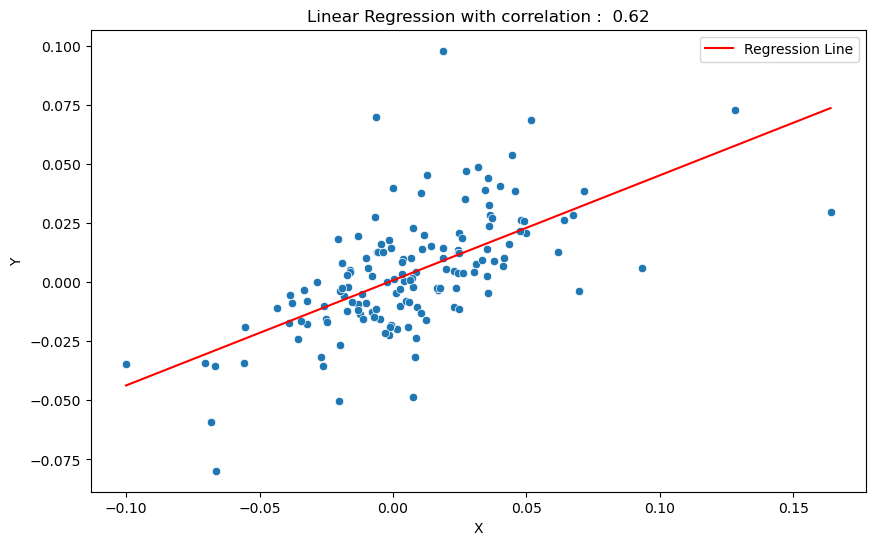

In [4]:
x = df['NVDA'].pct_change().dropna()
y = df['TSM'].pct_change().dropna()

model = linear_regression(x.values, y.values)


In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     87.93
Date:                Fri, 16 Aug 2024   Prob (F-statistic):           1.40e-16
Time:                        18:56:26   Log-Likelihood:                 363.03
No. Observations:                 145   AIC:                            -722.1
Df Residuals:                     143   BIC:                            -716.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.002      0.449      0.654      -0.003       0.004
x1             0.4444      0.047      9.377      0.000       0.351       0.538
==============================================================================
Omnibus:                       27.913   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.052
Skew:                           0.727   Prob(JB):                     5.04e-17
Kurtosis:                       6.211   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""